# Artificial Intelligence and Machine Learning <a class="tocSkip">


## Unit II <a class="tocSkip">
### The geometry of linear maps
**Iacopo Masi**


## 📚 Textbooks 


- The course is inspired and follows [CS229 by Stanford](http://cs229.stanford.edu/syllabus-summer2020.html) while other material is inspired from other courses 

There is not a single textbook but suggested are:

| Topic           | Authors       | Book |
| :-------------: |:-------------:|:-------------:|
| Generic ML      | H. Daumé III  | "A Course in Machine Learning",  [download the book](http://ciml.info/)     |
| Generic ML      | Christopher M. Bishop | “Pattern Recognition and Machine Learning” [download the book](https://www.microsoft.com/en-us/research/uploads/prod/2006/01/Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf)    |
| Generic ML      | Kevin P. Murphy |  “Probabilistic Machine Learning: An introduction", MIT Press, 2021     |
| Deep Learning   | Ian Goodfellow and Yoshua Bengio and Aaron Courville | “Deep Learning”, MIT Press 2016   |
| Deep Learning   | Ston Zhang, Zack C. Lipton,  Mu Li, Alex J. Smola | **[“Dive into Deep Learning”](https://d2l.ai/)**   |

**You can find online most of these or part of them.**

# Recap on Linear Algebra

- [This pdf covers this part](http://cs229.stanford.edu/summer2019/cs229-linalg.pdf)
- [Illustrations and some math part are taken from d2l.ai, linear algebra](https://d2l.ai/chapter_preliminaries/linear-algebra.html)
- [and from d2l.ai, geometric linear algebra](https://d2l.ai/chapter_appendix-mathematics-for-deep-learning/geometry-linear-algebraic-ops.html)

## Training set

\begin{equation}
 \underbrace{\{\mathbf{x}_i,y_i\}_{i=1}^N}_{\text{known}} \sim \underbrace{\mathcal{D}}_{\text{unknown}}
\end{equation}

## $\mathbf{x}$ as a high-dimensional point in a vector space

-  $\mathbf{x} \in \mathbb{R}^D$ is a vector in D-dimensional real-space
-  All the vectors are identified by using another point that functions as **origin**, i.e. in $\mathbf{O}=(0, 0, 0)$ in $\mathbb{R}^3$.
- Moreover, in order for this to work you need an **orthonormal set of basis vectors** on which you can express your vector.
-  $\mathbf{\vec{x}}$ is bold because it means it's a vector; we drop $\vec{}$ for clarity.
-  $y$ is a scalar value (it is not bold).

### Vectors are written column-wise

$$\mathbf{x} =  
\begin{bmatrix}
x_0, \\
x_1, \\
\ldots, \\
x_{D-1} \\
\end{bmatrix} $$

### To make it row-wise just transpose it

$$\mathbf{x}^{T} = \begin{bmatrix}
x_0, & x_1, & \ldots, x_{D-1} \\
\end{bmatrix} $$

## Numpy

NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays

<img class="center" src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/31/NumPy_logo_2020.svg/220px-NumPy_logo_2020.svg.png" />

## During the course, we will learn how to "vectorize" the code (i.e. avoiding for loop).

In [1]:
import numpy as np
x = np.array([[2.5, 3.2], [0, 1], [2, -3]], dtype=np.float32)
print(x)
print(f"Shape {x.shape}")  # the shape is...
print(f"Number of dimensions: {x.ndim}")  # is a matrix (2 axis)
print(f"Number of elements: {x.size}")  # with 6 elements

v = np.array([2.5, 3.2])  # used later 

[[ 2.5  3.2]
 [ 0.   1. ]
 [ 2.  -3. ]]
Shape (3, 2)
Number of dimension: 2
Number of elements: 6


# Let's try to plot vector

$$\mathbf{x}^{T} = \begin{bmatrix} 2.5, 3.2 \\\end{bmatrix} $$

```python
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

v = np.array([2.5, 3.2])
# all the X first, then all the Y
#        [X1   X2]    [Y1  Y2]
plt.plot([0, v[0]], [0, v[1]], 
         marker='x', color='red', lw=4,
         markersize=6)
```

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('seaborn-v0_8-white')
font = {'family': 'sans-serif',
        'weight': 'bold',
        'size': 22}
matplotlib.rc('font', **font)

# Plotting
plt.figure(figsize=(10, 10))
plt.plot(v[0], v[1], marker='x', color='red', lw=4, markersize=6)
# all the X first, then all the Y
plt.plot([0, v[0]], [0, v[1]], marker='x', color='red', lw=4, markersize=6)
# Eyecandy
plt.axis('equal')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.title("Vector")
plt.annotate('(0, 0)', xy=(0, 0), xytext=(.1, -.3))
plt.annotate(f'({v[0]},{v[1]})', xy=(v[0], v[1]), xytext=(v[0], v[1]))
plt.axis([-5, 5, -5, 5])
plt.show()

ModuleNotFoundError: No module named 'matplotlib'

# Vectors: Geometric Interpretation 1 
## Point in space

- Given a vector, the first interpretation
that we should give it is as a **point in space.**

- In two or three dimensions, we can visualize these points
by using the components of the vectors to define
the location of the points in space compared
to a fixed reference called the *origin*.

<img class="center" src="https://raw.githubusercontent.com/d2l-ai/d2l-en/master/img/grid-points.svg" width="30%">


##### Formalizing problems
This geometric point of view allows us to consider the problem on a more abstract level.
No longer faced with some insurmountable seeming problem
like classifying pictures as either cats or dogs but separate points in space.

`Problem -> Formalization -> Math -> Computational System`

<small>Taken from [d2l.ai](https://d2l.ai)<small>

# Vectors: Geometric Interpretation 2 
## Direction in space

In parallel, there is a second point of view
that people often take of vectors: as directions in space.
Not only can we think of the vector $\mathbf{v} = [3,2]^\top$
as the location $3$ units to the right and $2$ units up from the origin,
We can also think of it as the direction itself
to take $3$ steps to the right and $2$ steps up.
In this way, we consider all the vectors in the figure the same.
<img src="https://raw.githubusercontent.com/d2l-ai/d2l-en/master/img/par-vec.svg" width="30%">

## Direction in space

One of the benefits of this shift is that
we can make visual sense of the act of vector addition.
In particular, we follow the directions given by one vector,
and then follow the directions given by the other, as is seen below (rule of the parallelogram).

<img src="https://raw.githubusercontent.com/d2l-ai/d2l-en/master/img/vec-add.svg" width="30%">

Difference is just $\mathbf{A}-\mathbf{B}=\mathbf{A}+(-\mathbf{B})$

<small>Taken from [d2l.ai]<small>

## Matrix

$$ \mathbf{A} \in \mathbb{R}^{m\times n}$$ 

$$\mathbf{A} =  
\begin{bmatrix}
x_{11} & \ldots & x_{1n} \\
\ldots &      & \ldots \\
x_{m1}& \ldots& x_{mn} \\
\end{bmatrix}$$

## Interpretation

- $n$ column vectors in a real-valued M-dimensional space: $\{\mathbf{a}_i\}_{i=1}^n$ $\in \mathbb{R}^m$
- $m$ row vectors in a real-valued N-dimensional space: $\{\mathbf{a}^{T}_i\}_{i=1}^m$ $\in \mathbb{R}^n$

# Identity Matrix , Diagonal Matrix

$
\mathbf{I}_3 =  
\begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1 \\
\end{bmatrix}
$

$\mathbf{I}_3 = \text{diag}(1) $

In [ ]:
#help(np.diag)
A = np.diag(np.ones(3)) #firstly create a vector [1,1,1] and then makes it a diagonal matrix
print(A)

NameError: name 'np' is not defined

# Symmetric Matrix

## What does the transpose operation do?

$$ \mathbf{A}  =  \mathbf{A}^{\top} $$

or else:

$$(A^{\top})_{ij} = A_{ji}$$

### Properties of transposing

 - $(\mathbf{A}^T)^T =  \mathbf{A}$
 - $(\mathbf{A}\mathbf{B})^T = \mathbf{B}^T\mathbf{A}^T$
 - $(\mathbf{A}+\mathbf{B})^T = \mathbf{A}^T+\mathbf{B}^T$

# Trace of a Matrix

Trace is the sum of the diagonal elements

$$ \text{trace}(\mathbf{A}) = \sum_i A_{ii}$$

In [3]:
# is ID symmetric?
ID = np.diag(np.ones(3))
np.all(ID == ID.T)  # == does the comparison element-wise

True

In [ ]:
# Generate array from 0 to 8 of int64
# reshape it in a 3x3 matrix
A = np.arange(9).reshape(3, 3)
print(f'A is \n {A}', end='\n'*2)
print(f'The transpose of A is \n {A.T}', end='\n'*2)
print(f'A is if type {A.dtype}')

A is 
 [[0 1 2]
 [3 4 5]
 [6 7 8]]

The transpose of A is 
 [[0 3 6]
 [1 4 7]
 [2 5 8]]

A is if type int64


# Reduction operations (sum across rows)

Sum all the values **across rows** (rows will disappear)
Sum all values across axis 0.
```
[ a11 a12 a13
  a21 a22 a23 ]
```

```
⬇️ ⬇️ ⬇️
⬇️ ⬇️ ⬇️
```
$R=2, C=3$


$\mathbf{s}_c = \sum_{r=1}^R \mathbf{A}_{rc}, \forall c \in C $ 

$\mathbf{s}$ is $1 \times C = 1 \times 3= 3.$

In [ ]:
print(A,end='\n\n')
# Possible to do a reduction on the matrix (sum along rows)
A_c = A.sum(axis=0, keepdims=False)  # 3 (rows are canceled out)
A_c.shape
print(A_c)

[[0 1 2]
 [3 4 5]
 [6 7 8]]

[ 9 12 15]


In [ ]:
# Works for other operations too like mean (average)
A.mean(axis=0, keepdims=False)  # 3 (rows are canceled out)

array([3., 4., 5.])

# Generally operations are element-wise

$$ C_{ij} = A_{ij} + B_{ij} $$

In [ ]:
A = np.arange(9).reshape(3, 3)
B = np.ones_like(A)
C = A + B # if now you have all 1 you can also get the same with A + 1 and will do
print('C', C, 'A', A, 'B', B, sep='\n\n')
np.allclose(C, A+1) # you can sum matrix + scalar, numpy will broadcast

C

[[1 2 3]
 [4 5 6]
 [7 8 9]]

A

[[0 1 2]
 [3 4 5]
 [6 7 8]]

B

[[1 1 1]
 [1 1 1]
 [1 1 1]]


True

In [5]:
A = np.arange(9).reshape(3,3)
B = np.zeros_like(A) #np.ones_like(A)*1.5
C = A * B # Hadamard product (multply element-wise)
print('C',C,'A',A,'B',B,sep='\n\n')
np.allclose(C, A*0)

C

[[0 0 0]
 [0 0 0]
 [0 0 0]]

A

[[0 1 2]
 [3 4 5]
 [6 7 8]]

B

[[0 0 0]
 [0 0 0]
 [0 0 0]]


True

# Reduction operations (sum across cols)

Sum all the values **across cols** (cols will disappear)
Sum all values across axis 1.
```
a11 a12 a13
a21 a22 a23
```

```
➡️ ➡️ ➡️
➡️ ➡️ ➡️
```
$R=2, C=3$


$\mathbf{s}_r = \sum_{c=1}^C \mathbf{A}_{rc}, \forall r \in R $ 

$\mathbf{s}$ is $R \times 1 = 2 \times 1= 2$

In [11]:
# Sum all the values across cols (cols will disappear)
# Sum all values across axis 1.
print(A)
A.sum(axis=(0,1), keepdims=False) #3 (cols are cancelled out)

[[0 1 2]
 [3 4 5]
 [6 7 8]]


36

# Non-reduction operations (sum)

- Sum all the values across row-wise (rows will disappear)
- **but unlike before keep the shape of the vector**.
```
a11 a12 a13
a21 a22 a23
```
$R=2, C=3$


$ \mathbf{s}_c= \sum_{r=1}^R \mathbf{A}_{rc}, \forall c \in C $ 

$\mathbf{s}$ is $1 \times C = 1 \times 3$

In [ ]:
# Works for other operations too like mean (average)
A.mean(axis=0, keepdims=True) #1x3 (rows are cancelled out but row axis is NOT dropped)

array([[3., 4., 5.]])

# Vector to Vector Operation

# Inner Product (Dot Product)

\begin{equation} \mathbf{x}, \mathbf{y} \in \mathbb{R}^D ~~~~~~~~~\quad 
\mathbf{x}^T \mathbf{y} = \left\langle\mathbf{x}, \mathbf{y}\right\rangle = \sum_i^D \mathbf{x}_i \cdot \mathbf{y}_i
\end{equation}

```
x1 x2 x3 x4 
           y1
           y2   =    result (dot_product)
           y3
           y4


dot_product = x1y1 + x2y2 + x3y3 + x4y4
```

- The result is a **scalar** (not a vector anymore).
- Must be in the same dimension
- It is **commutative**
- The data is **paired**: just multiply elementwise and sum across the axis.

In [13]:
x = np.array([1, 2, 3])
y = np.array([1, 0, 1])
np.dot(x, y) == np.sum(x*y)

True

# Inner product: Geometric Interpretation

The dot product also admits a geometric interpretation: **it is closely related to the angle between two vectors.** 

<img src="https://raw.githubusercontent.com/d2l-ai/d2l-en/master/img/vec-angle.svg" width="30%">

$$
\mathbf{v}^{\top}\cdot\mathbf{w} = \|\mathbf{v}\|\|\mathbf{w}\|\cos(\theta).
$$

With some simple algebraic manipulation, we can rearrange terms to obtain

$$
\theta = \arccos\left(\frac{\mathbf{v}^T\cdot\mathbf{w}}{\|\mathbf{v}\|\|\mathbf{w}\|}\right).
$$


This is a nice result since nothing in the computation references two-dimensions.

**Indeed, we can use this in three or three million dimensions without issue.**

In [ ]:
def angle(v, w):
    return np.arccos(v.dot(w) / (np.linalg.norm(v) * np.linalg.norm(w)))

angle(np.array([0, 1, 2]), np.array([2, 3, 4])) # the result is in radians

0.4189900840328574

### Cosine Similarity
In ML contexts where the **angle is employed
to measure the closeness of two vectors**,
practitioners adopt the term **cosine similarity**
to refer to the portion
$$
\cos(\theta) = \underbrace{\frac{\mathbf{v}^T\cdot\mathbf{w}}{\|\mathbf{v}\|\|\mathbf{w}\|}}_{\text{cosine similarity}}.
$$

- What happens if cosine similarity is 1?
- Notice any similarity with some concept we saw in the previous lecture?

# Outer Product

$$ \mathbf{x} \in \mathbb{R}^D, \mathbf{y} \in \mathbb{R}^P $$

\begin{equation}
\mathbf{x} \mathbf{y}^T \neq \mathbf{y} \mathbf{x}^T
\end{equation}


```
           P           ____________________
      y1 y2 y3 y4     | x1 * yi for each Y |
   x1                 |                    |
D  x2              =  |                    |
   x3                 |___________________ |
```



- The result is a **matrix** (not a vector anymore)
- Input can have different dimensions. The output is $D \times P$ dimensional.
- It is **NOT commutative**
- The data is not paired $\rightarrow$ compute all combinations.
- Very Important to build matrices from the ground-up: a complex matrix is the **sum of outer products (sum of rank-1 matrices).**

In [ ]:
x = np.array([1, 2, 3])
y = np.array([1, 0, 1, -1])
np.outer(x,y)

array([[ 1,  0,  1, -1],
       [ 2,  0,  2, -2],
       [ 3,  0,  3, -3]])

# Matrix to Vector Operation

$\mathbf{A} \in \mathbb{R}^{m \times n} ~~$ 
$\mathbf{x} \in \mathbb{R}^{n \times 1}$  

$\mathbf{A}\mathbf{x} =\mathbf{b}$

$$
\mathbf{A} =  
\begin{bmatrix}
a_{11} & \ldots & a_{1n} \\
\ldots &      & \ldots \\
a_{m1}& \ldots& a_{mn} \\
\end{bmatrix}~~
\mathbf{x} =  
\begin{bmatrix}
x_{11} \\
\ldots  \\
x_{n1} \\
\end{bmatrix}
$$

### Two interpretations
1. Take each row of A, that is $\mathbf{a}_r^T$, then do inner product with $\mathbf{x}$
$$
\mathbf{b} = 
\begin{bmatrix}
\mathbf{a}_1^T\mathbf{x}   \\
\ldots  \\
\mathbf{a}_m^T\mathbf{x}  \\
\end{bmatrix}
$$

2. Take each value of $\mathbf{x}$, scale each column of A; sum across cols (axis=1).



## Applications (moving points in space)

For example, we can represent rotations as multiplications by a square matrix and rotate points.

In [ ]:
A = np.arange(27).reshape(3, 9)
x = np.ones((9, 1))
b = A @ x  # 3x9 @ 9x1 = 3x1
bb = np.matmul(A, x)
bbb = np.dot(A,x)
print('A', A, 'x', x, 'b', b, 'bb', bb,'bbb', bbb, sep='\n\n')

# Questions for you: A*B does elementwise multiplcation # will it work?

A

[[ 0  1  2  3  4  5  6  7  8]
 [ 9 10 11 12 13 14 15 16 17]
 [18 19 20 21 22 23 24 25 26]]

x

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]

b

[[ 36.]
 [117.]
 [198.]]

bb

[[ 36.]
 [117.]
 [198.]]

bbb

[[ 36.]
 [117.]
 [198.]]


## Matrix-Matrix Multiplication

We have two matrices 
$\mathbf{A} \in \mathbb{R}^{n \times k}$ 
and $\mathbf{B} \in \mathbb{R}^{k \times m}$:

- Note number of **columns** in $\mathbf{A}$ must match number of **rows** in $\mathbf{B}$. 

$$\mathbf{A}=\begin{bmatrix}
 a_{11} & a_{12} & \cdots & a_{1k} \\
 a_{21} & a_{22} & \cdots & a_{2k} \\
\vdots & \vdots & \ddots & \vdots \\
 a_{n1} & a_{n2} & \cdots & a_{nk} \\
\end{bmatrix},\quad
\mathbf{B}=\begin{bmatrix}
 b_{11} & b_{12} & \cdots & b_{1m} \\
 b_{21} & b_{22} & \cdots & b_{2m} \\
\vdots & \vdots & \ddots & \vdots \\
 b_{k1} & b_{k2} & \cdots & b_{km} \\
\end{bmatrix}.$$

Let $\mathbf{a}^\top_{i} \in \mathbb{R}^k$ denote 
the row vector representing the $i^\mathrm{th}$ row 
of the matrix $\mathbf{A}$
and let $\mathbf{b}_{j} \in \mathbb{R}^k$ denote 
the column vector from the $j^\mathrm{th}$ column 
of the matrix $\mathbf{B}$:

$$\mathbf{A}=
\begin{bmatrix}
\mathbf{a}^\top_{1} \\
\mathbf{a}^\top_{2} \\
\vdots \\
\mathbf{a}^\top_n \\
\end{bmatrix},
\quad \mathbf{B}=\begin{bmatrix}
 \mathbf{b}_{1} & \mathbf{b}_{2} & \cdots & \mathbf{b}_{m} \\
\end{bmatrix}.
$$

To form the matrix product $\mathbf{C} \in \mathbb{R}^{n \times m}$,
we simply compute each element $c_{ij}$
as the **dot product** between 
the $i^{\mathrm{th}}$ row of $\mathbf{A}$
and the $j^{\mathrm{th}}$ row of $\mathbf{B}$,
i.e., $\mathbf{a}^\top_i \mathbf{b}_j$:

$$\mathbf{C} = \mathbf{AB} = \begin{bmatrix}
\mathbf{a}^\top_{1} \\
\mathbf{a}^\top_{2} \\
\vdots \\
\mathbf{a}^\top_n \\
\end{bmatrix}
\begin{bmatrix}
 \mathbf{b}_{1} & \mathbf{b}_{2} & \cdots & \mathbf{b}_{m} \\
\end{bmatrix}
= \begin{bmatrix}
\mathbf{a}^\top_{1} \mathbf{b}_1 & \mathbf{a}^\top_{1}\mathbf{b}_2& \cdots & \mathbf{a}^\top_{1} \mathbf{b}_m \\
 \mathbf{a}^\top_{2}\mathbf{b}_1 & \mathbf{a}^\top_{2} \mathbf{b}_2 & \cdots & \mathbf{a}^\top_{2} \mathbf{b}_m \\
 \vdots & \vdots & \ddots &\vdots\\
\mathbf{a}^\top_{n} \mathbf{b}_1 & \mathbf{a}^\top_{n}\mathbf{b}_2& \cdots& \mathbf{a}^\top_{n} \mathbf{b}_m
\end{bmatrix}.
$$

**We can think of the matrix-matrix multiplication $\mathbf{AB}$
as performing $m$ matrix-vector products 
or $m \times n$ dot products 
and stitching the results together 
to form an $n \times m$ matrix.**


The term *matrix-matrix multiplication* is 
often simplified to *matrix multiplication*,
and should not be confused with the Hadamard product (element-wise product).

<small>Taken from [d2l.ai](https://d2l.ai/chapter_preliminaries/linear-algebra.html#matrices)<small>

In [ ]:
A = np.random.rand(3, 5)
B = np.random.rand(5, 2)
# 3x2 = 3x5 @ 5x2
C = A @ B
print('A', A, 'B', B, 'C', C, sep='\n\n')

A

[[0.92941761 0.40696576 0.18989069 0.89380419 0.22430295]
 [0.76904541 0.86911099 0.38901898 0.31112103 0.940543  ]
 [0.18590819 0.63512961 0.17277272 0.68511615 0.86686537]]

B

[[0.4028066  0.10113815]
 [0.3805756  0.41692926]
 [0.82436818 0.55743099]
 [0.93730416 0.8644262 ]
 [0.50241325 0.42483043]]

C

[[1.63625578 1.23744493]
 [1.72539018 1.32550132]
 [1.53671508 1.34041853]]


# All the operations in "one fell swoop"

## Ladies and gentlemen welcome to....

### Einsum 

<img src="https://miro.medium.com/v2/resize:fit:1100/format:webp/1*osvOUFHA9oSRjQzOymT7KA.jpeg" width="30%">

# Einsum = Einstein summation

A is $i\times k$ and B is $k \times j$.

$$ (A\cdot B)_{ij} = \sum_{k=1}^K A_{ik}\cdot B_{kj}$$

Sums take space, so let's remove them using einsum becomes:

$$ (A\cdot B)_{ij} =  A_{ik}B_{kj}$$

#### Indexes (or variables):
- **Free indexes** are $i,j$ if you see they are specified in the output. They are in the input but they are let "free" in the output
- **Summation indexes** are all those that are not preserved in the output, $k$ in this case.

# Einsum = Einstein summation

A is $i\times k$ and B is $k \times j$.

$$ (A\cdot B)_{ij} = \sum_{k=1}^K A_{ik}\cdot B_{kj} \quad \rightarrow \quad (A\cdot B)_{ij} =  A_{ik}B_{kj}$$

### The computer science way

- `matmul` takes as input two variables A, B of shape: $i\times k$, $~~~~k \times j$
- `matmul` returns as output a shape as ij

$$ i\times k, ~~~~k \times j \quad \rightarrow \quad i\times j$$

# Einsum 

$$ i\times k, ~~~~k \times j \quad \rightarrow \quad i\times j$$

# Einsum 

Usual way:
```python
C = A @ B
```
<br/>

Einsum way:
```python
C = np.einsum('ik,kj -> ij', A, B)
```

The usual way seems shorter.

# Einsum

Let's now say you have:

```python
A = np.array([0, 1, 2]) #1x3

B = np.array([[ 0,  1,  2,  3],
              [ 4,  5,  6,  7],
              [ 8,  9, 10, 11]]) #3x4
# we wanna do 3x1 X 3x4 but cannot do it but we can do 3x3 X 3x4
```


Suppose we have two arrays, A and B. Now suppose that we want to:

- **multiply** **A** with **B** in a particular way to create a new array of products, and then maybe
- **sum** this new array along particular axes, and/or

<ins>Taken from https://ajcr.net/Basic-guide-to-einsum/</ins>

In [ ]:
A = np.array([0, 1, 2])

B = np.array([[ 0,  1,  2,  3],
              [ 4,  5,  6,  7],
              [ 8,  9, 10, 11]])
A@B # we do NOT wanna do this
#  0*0
#  4*1
#  8*2

array([20, 23, 26, 29])

In [ ]:
A = np.array([0, 1, 2]) #1x3   3x4
B = np.array([[ 0,  1,  2,  3],  # 0
              [ 4,  5,  6,  7],  # 1
              [ 8,  9, 10, 11]]) # 2
A[:, np.newaxis] * B # we wanna do this np.newaxis is broad cast and tells 
                     # numpy to put A as col vector 

array([[ 0,  0,  0,  0],
       [ 4,  5,  6,  7],
       [16, 18, 20, 22]])

In [ ]:
A[:, np.newaxis] * B # same as below
np.repeat(A.reshape(-1, 1), 4, axis=1)*B

array([[ 0,  0,  0,  0],
       [ 4,  5,  6,  7],
       [16, 18, 20, 22]])

In [ ]:
(A[:, np.newaxis] * B ).sum(axis=1)# ----> horizontal

array([ 0, 22, 76])

# Comparison with Einsum

```python
(A[:, np.newaxis] * B ).sum(axis=1)
array([ 0, 22, 76])
```
<br/>


```python
np.einsum('i,ij->i', A, B)
array([ 0, 22, 76])
```

```python
np.einsum('i,ij->i', A, B) #3 X 3x4 --> 3

```
- we do not need to reshape A at all and, 
- most importantly, the multiplication did not create a temporary array like `A[:, np.newaxis] * B` did. Instead, einsum simply summed the products along the rows as it went. Even for this tiny example, I timed einsum to be about three times faster.


# Einsum: Multiply two matrices
```python
A = np.array([[1, 1, 1],
              [2, 2, 2],
              [5, 5, 5]])

B = np.array([[0, 1, 0],
              [1, 1, 0],
              [1, 1, 1]])

np.einsum('ij,jk->ik', A, B)
```
<img src="https://ajcr.net/images/matrix_mul_reduce.png" >

# Einsum: Rules

`np.einsum('ij,jk->ik', A, B)`
1. **Repeating** letters between input arrays means that values along those axes will be **multiplied** together. The products make up the values for the output array. `j`
2. **Omitting** a letter from the output means that values along that axis will be **summed**. `j`
3. We can return the **unsummed axes** in any **order** we like. `ik`
<img src="https://ajcr.net/images/matrix_mul_reduce.png" >

# Einsum: Multiply two matrices without reduction (tensor)
```python
A = np.array([[1, 1, 1],
              [2, 2, 2],
              [5, 5, 5]])

B = np.array([[0, 1, 0],
              [1, 1, 0],
              [1, 1, 1]])

np.einsum('ij,jk->ijk', A, B)
```
<img src="https://ajcr.net/images/matrix_mul_reduce.png" >

In [16]:
A = np.array([[1, 1, 1],
              [2, 2, 2],
              [5, 5, 5]])

B = np.array([[0, 1, 0],
              [1, 1, 0],
              [1, 1, 1]])
C = np.einsum('ij,jk->ijk', A, B)
print(C, C.shape, sep='\n')


[[[0 1 0]
  [1 1 0]
  [1 1 1]]

 [[0 2 0]
  [2 2 0]
  [2 2 2]]

 [[0 5 0]
  [5 5 0]
  [5 5 5]]]
(3, 3, 3)


<img src="https://ajcr.net/images/matrix_mul_full_and_reduce.png">

In [ ]:
# C.sum(axis=1) # what happens if we do?

In [ ]:
# np.einsum('ij,jk->ik', A, B)

# Einsum: CheatSheet 1D

A is $d\times 1$ and B is also $d\times 1$

<br/>

| Call signature | NumPy equivalent | Description                                     |
|----------------|------------------|-------------------------------------------------|
| ('i', A)       | A                | returns a view of A                             |
| ('i->', A)     | sum(A)           | sums the values of A                            |
| ('i,i->i', A, B) | A * B          | element-wise multiplication of A and B         |
| ('i,i', A, B)  | inner(A, B)      | inner product of A and B                        |
| ('i,j->ij', A, B) | outer(A, B)    | outer product of A and B                        |


# Einsum: CheatSheet 2 D

A is $i\times k$ and B is also $k\times j$

<br/>

| Call signature | NumPy equivalent | Description                                      |
|----------------|------------------|--------------------------------------------------|
| ('ij', A)      | A                | returns a view of A                              |
| ('ji', A)      | A.T              | view transpose of A                              |
| ('ii->i', A)   | diag(A)          | view main diagonal of A                         |
| ('ii', A)      | trace(A)         | sums main diagonal of A                         |
| ('ij->', A)    | sum(A)           | sums the values of A                            |
| ('ij->j', A)   | sum(A, axis=0)   | sum down the columns of A (across rows)         |
| ('ij->i', A)   | sum(A, axis=1)   | sum horizontally along the rows of A            |
| ('ij,ij->ij', A, B) | A * B       | element-wise multiplication of A and B          |
| ('ij,ji->ij', A, B) | A * B.T     | element-wise multiplication of A and B.T        |
| ('ij,jk', A, B) | dot(A, B)       | matrix multiplication of A and B                |
| ('ij,kj->ik', A, B) | inner(A, B) | inner product of A and B                        |
| ('ij,kj->ikj', A, B) | A[:, None] * B | each row of A multiplied by B                 |
| ('ij,kl->ijkl', A, B) | A[:, :, None, None] * B | each value of A multiplied by B         |



In [ ]:
C = np.einsum('ij,kl->ijkl', A, B)
C.shape

(3, 3, 3, 3)

# A final note on [computational] matrix order

$$ \underbrace{A}_{m\times n}~\big(\underbrace{B}_{n\times p}~\underbrace{C}_{p\times q}\big) \doteq \big(\underbrace{A}_{m\times n}~\underbrace{B}_{n\times p}\big)~\underbrace{C}_{p\times q}  $$

Who thinks the computational time of this inside the machines is the same?

### Complexity
- Case 1: $npq$ + $mnq$
- Case 2: $mnp$ + $mpq$ 

**No, it is not the same.** So let's say C is a column vector, which one is faster?

# Why Matrices?

Matrices are useful data structures: they allow us to organize data that have different modalities of variation. 
For example:
- **rows** in our matrix might correspond to **different houses (data examples)**, `apartment 1`
- while **columns** might correspond to **different attributes (features)** `size, cost, energy consumption`

### 1. Good to model linear transformations in space

### 2. Good to model the data. Design matrix ( `num of samples x features`)

$$\mathbf{X} ~~~ \text{3 points} \in \mathbb{R}^2$$

| Attribute 1  | Attribute 2 |
| ------------- |:-------------:|
| Example 1     | Example 1    |
| Example 2     | Example 2     |
| Example 3      | Example 3    |

$$\mathbf{y}$$

| Labels 
| ------------- |
| Label for Ex 1     |
| Label for Ex 2     | 
| Label for Ex 3      | 

### 3. Express variations in data (covariance matrix is a symmetric matrix)

### 4. Give the direction where to move to minimize loss (Gradients, Deep Learning)

## Norms

Some of the most useful operators in linear algebra are *norms*.
Informally, the norm of a vector tells us how **big** it is. 

For instance, the $\ell_2$ norm measures
the (Euclidean) **length of a vector.**

Here, we are employing a notion of **size** that concerns the **magnitude** a vector's components **(not its dimensionality).**

A norm is a function $\| \cdot \|$ that maps a vector
to a scalar and satisfies the following three properties:

1. Given any vector $\mathbf{x}$, if we scale (all elements of) the vector 
   by a scalar $\alpha \in \mathbb{R}$, its norm scales accordingly:
   $$\|\alpha \mathbf{x}\| = |\alpha| \|\mathbf{x}\|.$$
2. For any vectors $\mathbf{x}$ and $\mathbf{y}$:
   norms satisfy the triangle inequality:
   $$\|\mathbf{x} + \mathbf{y}\| \leq \|\mathbf{x}\| + \|\mathbf{y}\|.$$
3. The norm of a vector is nonnegative and it only vanishes if the vector is zero:
   $$\|\mathbf{x}\| > 0 \text{ for all } \mathbf{x} \neq 0.$$

## $\ell_2$ norm
Many functions are valid norms and different norms 
encode different notions of size. 
The Euclidean norm that we all learned in elementary school geometry
when calculating the hypotenuse of right triangle
is the square root of the sum of squares of a vector's elements.
Formally, this is called **the $\ell_2$ *norm*** and expressed as

**$$\|\mathbf{x}\|_2 = \sqrt{\sum_{i=1}^n x_i^2}.$$**

The method `norm` calculates the $\ell_2$ norm.

```python
u = np.array([3, -4])
np.linalg.norm(u)
```

## $\ell_1$ norm

**The $\ell_1$ norm** is also popular 
and the associated metric is called the Manhattan distance. 
By definition, the $\ell_1$ norm sums 
the absolute values of a vector's elements:

**$$\|\mathbf{x}\|_1 = \sum_{i=1}^n \left|x_i \right|.$$**

Compared to the $\ell_2$ norm, it is less sensitive to outliers.
To compute the $\ell_1$ norm, 
we compose the absolute value
with the sum operation.

```python
np.abs(u).sum()
np.linalg.norm(u,1)
```

In [ ]:
# L1 norm
x = np.array([1, 2, 3, 4])
n1 = np.linalg.norm(x, ord=1)
n1b = np.abs(x).sum()
assert n1 == n1b

## $\ell_p$ norm

Both the $\ell_2$ and $\ell_1$ norms are special cases
of the more general $\ell_p$ *norms*:

$$\|\mathbf{x}\|_p = \left(\sum_{i=1}^n \left|x_i \right|^p \right)^{1/p}.$$

## Why norms?
- You can measure the distance between points!
- Application: You can compare two images in the pixel space (or better in a feature space)!

# Matrices as a linear map between spaces

- Do **NOT** think of a matrix as a bunch of random points.
- We have to start thinking **matrices as linear functions that map a space into another space**.

$$\mathbf{A} \in \mathbb{R}^{m \times n} ~~,\mathbf{x} \in \mathbb{R}^{n \times 1}$$ 

$$\underbrace{\mathbf{A}}_{\text{map}}\underbrace{\mathbf{x}}_{~~~\text{input}} =\underbrace{\mathbf{b}}_{\text{output}}$$

- You can think of having a function $f(\cdot;\mathbf{A})$ that is parametrized by the matrix $\mathbf{A}$.
- This means that $f$ is implemented with a linear map coded in the values of $\mathbf{A}$.
- $\mathbf{b} = f(\mathbf{x};\mathbf{A})$ is implemented as $\mathbf{A}\mathbf{x}=\mathbf{b}$

## Geometry of Linear Transformations of Basis Vector

$$
\mathbf{A} = \begin{bmatrix}
a & b \\ c & d
\end{bmatrix}
$$

If we want to apply this to an arbitrary vector
$\mathbf{v} = [x, y]^\top$,
we multiply and see that

$$
\begin{aligned}
\mathbf{A}\mathbf{v} & = \begin{bmatrix}a & b \\ c & d\end{bmatrix}\begin{bmatrix}x \\ y\end{bmatrix} \\
& = \begin{bmatrix}ax+by\\ cx+dy\end{bmatrix} \\
& = x\begin{bmatrix}a \\ c\end{bmatrix} + y\begin{bmatrix}b \\d\end{bmatrix} \\
& = x\left\{\mathbf{A}\begin{bmatrix}1\\0\end{bmatrix}\right\} + y\left\{\mathbf{A}\begin{bmatrix}0\\1\end{bmatrix}\right\}.
\end{aligned}
$$

$$
\begin{aligned}
\mathbf{A}\mathbf{v} & = x\left\{\mathbf{A}\begin{bmatrix}1\\0\end{bmatrix}\right\} + y\left\{\mathbf{A}\begin{bmatrix}0\\1\end{bmatrix}\right\}.
\end{aligned}
$$

This may seem like an odd computation,
where something clear became somewhat impenetrable.
However, it tells us that we can write the way
that a matrix transforms *any* vector
in terms of how it transforms *two specific vectors*:
$[1,0]^\top$ and $[0,1]^\top$.

**This is worth considering for a moment.
We have essentially reduced an infinite problem
(what happens to any pair of real numbers)
to a finite one (what happens to these specific vectors).**

#### These vectors are an example of a *basis*, where we can write any vector in our space as a **<ins>weighted sum of these basis vectors</ins>**.

Let's draw what happens when we use the specific matrix
$$
\mathbf{A} = \begin{bmatrix}
1 & 2 \\
-1 & 3
\end{bmatrix}.
$$
- $\text{Map}~ [1,0]~ \text{with}~ \mathbf{A}[1,0]^T = [1,-1]^T$
- $\text{Map} ~[0,1]~ \text{with} ~\mathbf{A}[0,1]^T =  [2,3]^T$

The matrix $\mathbf{A}$ acting on the given basis vectors.  Notice how the entire grid is transported along with it.

<img width="50%" src="https://raw.githubusercontent.com/d2l-ai/d2l-en/master/img/grid-transform.svg" />

- **This is the most important intuitive point
to internalize about linear transformations represented by matrices.**
- Matrices are incapable of distorting some parts of space differently than others.
- All they can do is take the original coordinates on our space and **skew, rotate, and scale them.**

# Demo

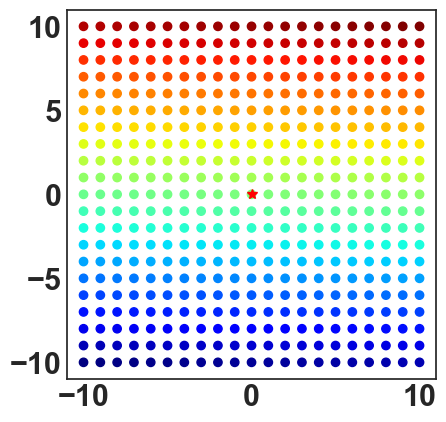

In [ ]:
import matplotlib.pyplot as plt

def plot_grid(Xs, Ys, axs=None):
    ''' Aux function to plot a grid'''
    t = np.arange(Xs.size) # define progression of int for indexing colormap
    if axs:
        axs.plot(0, 0, marker='*', markersize=7, color='r', linestyle='none') #plot origin
        axs.scatter(Xs,Ys, c=t, cmap='jet', marker='o') # scatter x vs y
        axs.axis('scaled') # axis scaled
    else:
        plt.plot(0, 0, marker='*', color='r',markersize=7, linestyle='none') #plot origin
        plt.scatter(Xs,Ys, c=t, cmap='jet', marker='o') # scatter x vs y
        plt.axis('scaled') # axis scaled

# let's see it with numpy
nX, nY, res = 10, 10, 21 # boundary of our space + resolution
X = np.linspace(-nX, +nX, res) # give me 21 points linear space from -10, +10 
Y = np.linspace(-nX, +nX, res) # give me 21 points linear space from -10, +10
# meshgrid is very useful to evaluate functions on a grid
# z = f(X,Y)
# please see https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html
Xs, Ys = np.meshgrid(X, Y) #NxN, NxN
plot_grid(Xs, Ys)
#plt.imshow(Ys, cmap='jet')

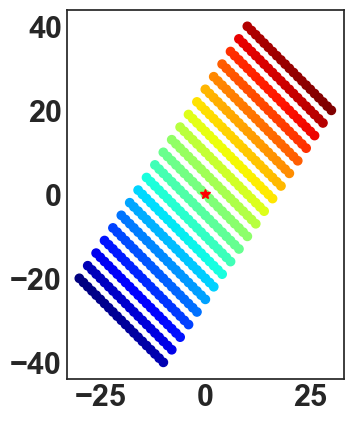

In [ ]:
# Transformation
# 2x2
A = np.array([[1,2],[-1,3]])
# axis         0 1 2
# [NxN,NxN] -> NxNx2 # add 3-rd axis, like adding another layer
src = np.stack((Xs,Ys), axis=2)
# flatten first two dimension
# (NN)x2
src_r = src.reshape(-1,src.shape[-1]) #ask reshape to keep last dimension and adjust the rest
# 2x2 @ 2x(NN)
dst = A @ src_r.T # 2xNN
#(NN)x2 and then reshape as NxNx2
dst = (dst.T).reshape(src.shape)
# Access X and Y
Xd, Yd = dst[:,:,0], dst[:,:,1]
plot_grid(Xd, Yd) # plot

In [ ]:
# Try to see what happens if you change A

# Try with identity matrix and then change values in the diagonal; then change other values
# A = np.array([[1.5,0], 
#               [0,0.5]])

# which kind of map does  A = np.array([[-1, 0], [0, -1]]) ?

# Linear Map _could_ induce _Severe_ Distortion of the space

[[ 1  2]
 [-1  3]]


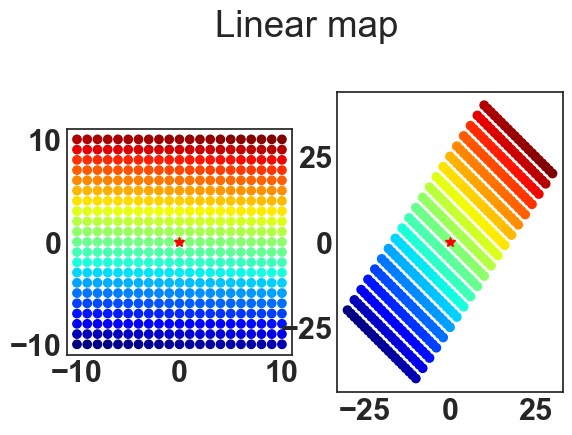

In [ ]:
def linear_map(A, Xs, Ys):
    '''Map src points with A'''
    # [NxN,NxN] -> NxNx2 # add 3-rd axis, like adding another layer
    src = np.stack((Xs, Ys), axis=2)
    # flatten first two dimension
    # (NN)x2
    # ask to reshape to keep the last dimension and adjust the rest
    src_r = src.reshape(-1, src.shape[-1])
    # 2x2 @ 2x(NN)
    dst = A @ src_r.T  # 2xNN
    # (NN)x2 and then reshape as NxNx2
    dst = (dst.T).reshape(src.shape)
    # Access X and Y
    return dst[:, :, 0], dst[:, :, 1]


A = np.array([[1, 2], [-1, 3]])
print(A)
Xd, Yd = linear_map(A, Xs, Ys)
fig, axs = plt.subplots(1, 2)
fig.suptitle('Linear map')
plot_grid(Xs, Ys, axs[0])
plot_grid(Xd, Yd, axs[1])
# In case we want to zoom on the center
# plt.xlim(-20,20)
# plt.ylim(-20,20)

[[ 2 -1]
 [ 4 -2]]


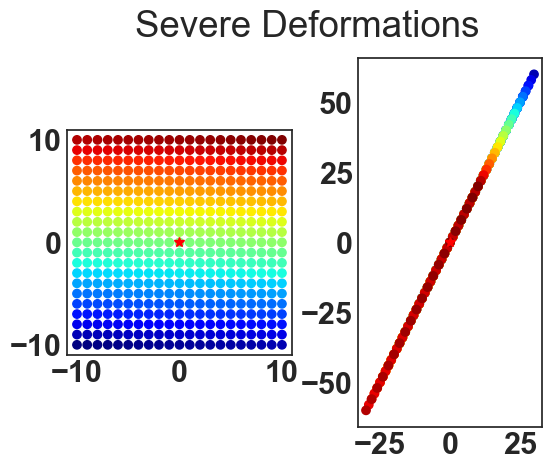

In [ ]:
A = np.array([[2, -1], 
              [4, -2]])
print(A)
Xd, Yd = linear_map(A, Xs, Ys)
fig, axs = plt.subplots(1,2)
fig.suptitle('Severe Deformations')
plot_grid(Xs,Ys,axs[0])
plot_grid(Xd,Yd,axs[1])

## Severe distortion

$$
\mathbf{B} = \begin{bmatrix}
2 & -1 \\ 4 & -2
\end{bmatrix},
$$

Severe distortion happens when we have a linear map that is not full rank. 
This means that the columns are not linearly independent. 

We can see how $\mathbf{B}$ compresses the entire two-dimensional plane down to a **single line**. 


The result from **first** matrix $\mathbf{A}$ can be "bent back" to the original grid.  
The results from matrix $\mathbf{B}$ cannot because we will never know where the vector $[1,2]^\top$ came from---was it $[1,1]^\top$ or $[0, -1]^\top$?
- Maps plane to line or maps line to points (one dimension is always lost)

## Higher Dimensions

- While this picture was for a $2\times2$ matrix,
nothing prevents us from taking the lessons learned into **higher dimensions.**

- If we take similar basis vectors like $[1,0, \ldots,0]$
and see where our matrix sends them,
we can start to get a feeling for how the matrix multiplication
distorts the entire space in whatever dimension space we are dealing with.

# Linear Map Properties:

$\def\mbf#1{\mathbf{#1}}$

**(Linearity)**. Suppose $\mathcal{V}$ and $\mathcal{V}^{\prime}$ are vector spaces. 
Then, $F : \mathcal{V} \mapsto \mathcal{V}^{\prime}$ is linear if it satisfies the following two criteria:

1. **[Sum Preservation]** $F(\mbf{v_1}+\mbf{v_2}) = F(\mbf{v_1})+F(\mbf{v_2})$
1. **[Scalar Product Preservation]** $F(\alpha\mbf{v}) = \alpha F(\mbf{v})$ 

# Linear Independent

Consider again the matrix

$$
\mathbf{B} = \begin{bmatrix}
2 & -1 \\ 4 & -2
\end{bmatrix}.
$$

This compresses the entire plane down to live on the single line $y = 2x$.
The question now arises: is there some way we can detect this
just by looking at the matrix itself?
The answer is that indeed we can.
Let's take $\mathbf{b}_1 = [2,4]^\top$ and $\mathbf{b}_2 = [-1, -2]^\top$
be the two columns of $\mathbf{B}$.
Remember that we can write everything transformed by the matrix $\mathbf{B}$
as a weighted sum of the columns of the matrix:
like $a_1\mathbf{b}_1 + a_2\mathbf{b}_2$.
We call this a *linear combination*.
The fact that $\mathbf{b}_1 = -2\cdot\mathbf{b}_2$
means that we can write any linear combination of those two columns
entirely in terms of say $\mathbf{b}_2$ since

$$
a_1\mathbf{b}_1 + a_2\mathbf{b}_2 = -2a_1\mathbf{b}_2 + a_2\mathbf{b}_2 = (a_2-2a_1)\mathbf{b}_2.
$$

This means that one of the columns is, in a sense, redundant
because it does not define a unique direction in space.
This should not surprise us too much
since we already saw that this matrix
collapses the entire plane down into a single line.
Moreover, we see that the linear dependence
$\mathbf{b}_1 = -2\cdot\mathbf{b}_2$ captures this.
To make this more symmetrical between the two vectors, we will write this as

$$
\mathbf{b}_1  + 2\cdot\mathbf{b}_2 = 0.
$$

In general, we will say that a collection of vectors
$\mathbf{v}_1, \ldots, \mathbf{v}_k$ are *linearly dependent*
if there exist coefficients $a_1, \ldots, a_k$ *not all equal to zero* so that

$$
\sum_{i=1}^k a_i\mathbf{v_i} = 0.
$$


- Thus, a linear dependence in the columns of a matrix
is a witness to the fact that our matrix
is **compressing the space down to some lower dimension.**
- If there is no linear dependence we say the vectors are *linearly independent*.
If the columns of a matrix $\mathbf{X}$ are linearly independent,
no compression occurs and the **operation can be undone.** This means that there exists the inverse matrix $\mathbf{X}^{-1}$

## Rank

**If we have a general $n\times m$ matrix,
it is reasonable to ask what dimension space the matrix maps into.**

A concept known as the *rank* will be our answer.

In the previous section, we noted that a linear dependence
bears witness to compression of space into a lower dimension
and so we will be able to use this to define the notion of rank.
In particular, the rank of a matrix $\mathbf{A}$
is the largest number of linearly independent columns
amongst all subsets of columns. For example, the matrix

$$
\mathbf{B} = \begin{bmatrix}
2 & 4 \\ -1 & -2
\end{bmatrix},
$$

has $\mathrm{rank}(B)=1$, since the two columns are linearly dependent,
but either column by itself is not linearly dependent.

- $\mathbf{B}$ is rank deficient while $\mathbf{A}$ is full rank.

For a more challenging example, we can consider

$$
\mathbf{C} = \begin{bmatrix}
1& 3 & 0 & -1 & 0 \\
-1 & 0 & 1 & 1 & -1 \\
0 & 3 & 1 & 0 & -1 \\
2 & 3 & -1 & -2 & 1
\end{bmatrix},
$$

and show that $\mathbf{C}$ has rank two $\mathrm{rank}(C)=2$ since, for instance,
the first two columns are linearly independent,
However any of the four collections of three columns are dependent.

## Invertibility

We have seen above that multiplication by a matrix with linearly dependent columns
cannot be undone, i.e., there is no inverse operation that can always recover the input.  However, multiplication by a full-rank matrix
(i.e., some $\mathbf{A}$ that is $n \times n$ matrix with rank $n$),
We should always be able to undo it.  Consider the matrix

$$
\mathbf{I} = \begin{bmatrix}
1 & 0 & \cdots & 0 \\
0 & 1 & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & 1
\end{bmatrix}.
$$

which is the matrix with ones along the diagonal, and zeros elsewhere.
We call this the *identity* matrix.
It is the matrix which leaves our data unchanged when applied.
To find a matrix which undoes what our matrix $\mathbf{A}$ has done,
We want to find a matrix $\mathbf{A}^{-1}$ such that

$$
\mathbf{A}^{-1}\mathbf{A} = \mathbf{A}\mathbf{A}^{-1} =  \mathbf{I}.
$$

If we look at this as a system, we have $n \times n$ unknowns
(the entries of $\mathbf{A}^{-1}$) and $n \times n$ equations
(the equality that needs to hold between every entry of the product $\mathbf{A}^{-1}\mathbf{A}$ and every entry of $\mathbf{I}$)
so we should generically expect a solution to exist.

[[ 1  2]
 [-1  3]]


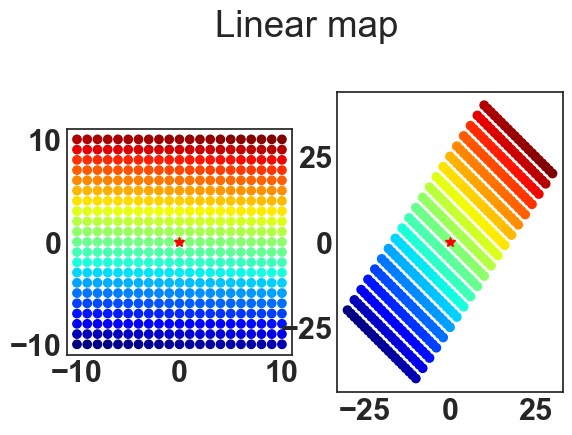

In [ ]:
A = np.array([[1, 2], [-1, 3]])
print(A)
Xd, Yd = linear_map(A, Xs, Ys)
fig, axs = plt.subplots(1,2)
fig.suptitle('Linear map')
plot_grid(Xs,Ys,axs[0])
plot_grid(Xd,Yd,axs[1])

[[ 0.6 -0.4]
 [ 0.2  0.2]]
Matrix rank is 2


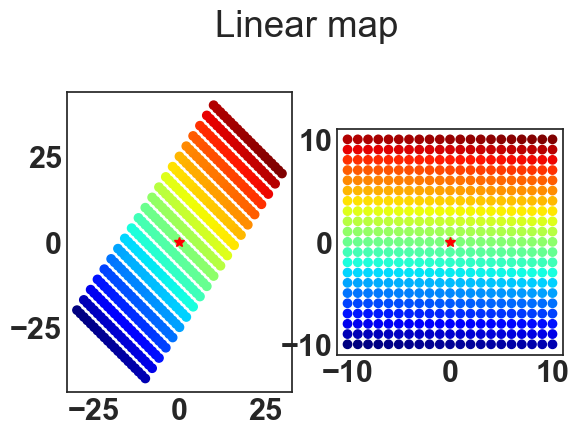

In [ ]:
A_inv = np.linalg.inv(A)
print(A_inv)
# Let's try inverse mapping
Xds, Yds = linear_map(A_inv, Xd, Yd)
fig, axs = plt.subplots(1,2)
fig.suptitle('Linear map')
plot_grid(Xd,Yd,axs[0])
plot_grid(Xds,Yds,axs[1])
print(f'Matrix rank is {np.linalg.matrix_rank(A)}')

## Determinant
The geometric view of linear algebra gives an intuitive way
to interpret a fundamental quantity known as the *determinant*.
Consider the grid image from before, but now with a highlighted region below.

![The matrix $\mathbf{A}$ again distorting the grid.  This time, I want to draw particular attention to what happens to the highlighted square.](https://raw.githubusercontent.com/d2l-ai/d2l-en/master/img/grid-transform-filled.svg)

Look at the highlighted square.  This is a square with edges given
by $(0, 1)$ and $(1, 0)$ and thus it has area one.
After $\mathbf{A}$ transforms this square,
we see that it becomes a parallelogram.
There is no reason this parallelogram should have the same area
that we started with, and indeed in the specific case shown here of

$$
\mathbf{A} = \begin{bmatrix}
1 & 2 \\
-1 & 3
\end{bmatrix},
$$

it is an exercise in coordinate geometry to compute
the area of this parallelogram and obtain that the area is $5$.

In general, if we have a matrix

$$
\mathbf{A} = \begin{bmatrix}
a & b \\
c & d
\end{bmatrix},
$$

We can see with some computation that the area
of the resulting parallelogram is $ad-bc$.
This area is referred to as the *determinant*.

## Determinant $\rightarrow$ Hyper-volume ratio

![The matrix $\mathbf{A}$ again distorting the grid.  This time, I want to draw particular attention to what happens to the highlighted square.](https://raw.githubusercontent.com/d2l-ai/d2l-en/master/img/grid-transform-filled.svg)

**Sanity Check:** We cannot apply Pythagoras Theorem to compute area because axes are not orthogonal anymore.

The picture is misleading since the axis is **CLOSED to be orthogonal**.

The angle between $[1, -1]$ and $[2,3]$ is 101.30993247402021 degrees
```python import numpy as np; X = np.array([[1, -1], [2, 3]]);thetarad = angle(X[0,:],X[1,:]);theta = thetarad*180/np.pi; print(theta)}}
```

The angle between $[1, 0]$ and $[0, 1]$ is 90 degrees.

```python
is_basis = False
X = np.array([[1, 0], [0, 1]]) if is_basis else np.array([[1, -1], [2, 3]])
theta_rad = angle(*X)
theta = theta_rad*180/np.pi
print(theta_rad)
```

# Determinant $\rightarrow$ tells how the space is compressed

- Determinant is 0, compresses the space and loses a dimension (area zero)
- Determinant $\geq$ 0 moves the space  (the area is non zero)
- Determinant $\leq$ 0 moves the space and flips it (area is non zero but flips the order)

> A matrix $A$ is invertible if and only if
the determinant is not equal to zero.

Computing determinants for larger matrices can be laborious, but the intuition is the same

**The determinant remains the factor that $n\times n$ matrices scale $n$-dimensional volumes.**

# Hyperplanes

**Hyperplane**: a generalization to higher dimensions of a line ($D=2$) or of a plane ($D=3$).
In an $d$-dimensional vector space, a hyperplane has $d-1$ dimensions and **divides the space into two half-spaces.**

$ \mathbf{w}\mathbf{x} + \mathbf{b} = 0$ where $\mathbf{w}$ is a vector normal to the hyperplane and $\mathbf{b}$ is an offset

<img width='30%' src='https://d2l.ai/_images/space-division.svg' />

# Hyperplanes

**Hyperplane**: a generalization to higher dimensions of a line ($D=2$) or of a plane ($D=3$).
In an $d$-dimensional vector space, a hyperplane has $d-1$ dimensions and **divides the space into two half-spaces.**

$ \mathbf{w}\mathbf{x} + \mathbf{b} = 0$ where $\mathbf{w}$ is a vector normal to the hyperplane and $\mathbf{b}$ is an offset

<img width='30%' src='https://d2l.ai/_images/space-division-3d.svg' />

# Projection

Suppose that we have two vectors $\mathbf{v}$ and a column vector $\mathbf{w}=[2,1]^\top$.  

**We want to project $\mathbf{v}$ onto $\mathbf{w}$ or better project v onto the subspace (line in this case) of $\mathbf{w}$.**

Recalling trigonometry, we see the formula $\|\mathbf{v}\|\cos(\theta)$ is the length of the projection of the vector $\mathbf{v}$ onto the direction of $\mathbf{w}$

<img width='30%' src="https://raw.githubusercontent.com/d2l-ai/d2l-en/master/img/proj-vec.svg" />

## Projection vector onto subspace defined by $\mathbf{w}$

$$\mathbb{P}_\mathbf{w}(\mathbf{v}) = \frac{\mathbf{w}\mathbf{w}^T}{\mathbf{w}^T\mathbf{w}}\mathbf{v} = \left( \frac{\mathbf{w}}{||\mathbf{w}||}\right)\left(\frac{\mathbf{w}}{||\mathbf{w}||}\right)^T\mathbf{v}$$

Defining a unit vector $\mathbf{\hat{w}}=\frac{\mathbf{w}}{||\mathbf{w}||}$ we have:
$$\mathbb{P}_\mathbf{w}(\mathbf{v}) =  \underbrace{\mathbf{\hat{w}}}_{\text{direction}} \left(\underbrace{\mathbf{\hat{w}}^T \mathbf{v}}_{\text{length}}\right)$$

- Projection must be on unit vector $\alpha\cdot\mathbf{\hat{w}}$
- How long in this direction? $\alpha=\mathbf{\hat{w}}^T \mathbf{v}$ that gives the length of **v** onto **w**.
- **$\mathbf{w}$** can also be a matrix, not a vector (matrix which columns are vectors).